<a href="https://colab.research.google.com/github/b4urock/Brazil-Students-Sex-Abuse-Data-Analysis/blob/main/Projeto_M%C3%B3dulo_03_An%C3%A1lise_pense_2015_amostra2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de hipóteses para a queda da cobertura vacinal no Brasil**

Autor: Pablo Pereira
* [Linkedln](https://www.linkedin.com/in/pablo-pereira-3107/)
* [Github](https://github.com/b4urock)

# BootCamp Alura - Módulo 03

## Aula 01 - Educação, saúde e tipos de Dados

### Aula 01.01

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from zipfile import ZipFile
from matplotlib.gridspec import GridSpec
from statsmodels.stats.weightstats import zconfint

import datetime

from calendar import monthrange
from IPython.display import HTML

# Duas casas decimais serão utilizadas nas visualização do pandas - globalmente
pd.options.display.float_format = "{:.2f}".format

# Definindo a palette cm para o Sea Born
cm = sns.light_palette("red", as_cmap=True)

In [592]:
# Instalando o Plotly caso necessário
!pip install plotly==4.12.0

In [593]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [594]:
path = "/content/drive/MyDrive/Datasets/AluraBootcamp/Módulo03/PeNSE_2015_AMOSTRA2.zip"
zipobj = ZipFile(path)

zipped_file_path = zipobj.namelist()[1]
data = pd.DataFrame(pd.read_csv(zipobj.open(zipped_file_path), sep = ";", thousands=".", decimal=","))
data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296


In [595]:
data.shape

(16556, 181)

In [596]:
# Para ver o conteúdo do arquivo zip instanciado e outras informaações do zip
zipobj.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [597]:
# Mostra a lista de arquivos que estão no zip
zipobj.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [598]:
# Pegando o arquivo na posição 1
zipobj.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [599]:
# Por trás do google colab roda Linux (comandos Bash) e com ! aceita comandos deste sistema como abaixo
!ls

drive  sample_data


## Carregando o dicionário de dados

Carregando o dicionário de dados

In [600]:
dictionary_dataset = pd.read_excel(zipobj.read(zipobj.namelist()[-1]),sheet_name='AMOSTRA2_ALUNO', skipfooter=3)
dictionary_dataset.tail()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
1210,-1,Pulo no questionário
1211,1,Particular
1212,2,Comunitária
1213,3,Confessional
1214,4,Filantrópica


In [601]:
zipobj.namelist()[12]

'Dicionario_PENSE_Microdados_AMOSTRA2.xls'

In [602]:
dictionary_dataset.head(2)

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País


Função a para a criação de um dataframe com as perguntas e respostas do dicionário de dados.

## Funções que serão utilizados nos tratamentos dos dados

In [603]:
  #Inicializa os dicionários que serão usados
  answers = {}
  dictionary_by_id = {}

In [604]:
# Criação da Função para a geração do Dicionário de dados
def generate_dictionary_by_id():
  #Inicializa os dicionários que serão usados
  answers = {}

  # Varre o dataframe com o dicionário de dados
  for ind in dictionary_dataset.index:
      # Verifica se é uma pergunta pela característica do dado, no caso sendo string
      if (not str(dictionary_dataset.loc[ind]['VARIÁVEL']).isnumeric() and
          not str(dictionary_dataset.loc[ind]['VARIÁVEL']) == '-1'):
        # Antes de adicionar uma nova chave, adiciona um dicionário no segundo nível com as respostas
        # caso não seja a primeira linha
        if ind > 0:
          dictionary_by_id[key_id]['Respostas'] = answers
          answers = {} 

        # Chave Principal do dicionário  
        key_id = dictionary_dataset.loc[dictionary_dataset.index[ind]]['VARIÁVEL']
        
        # Adiciona a estrutura base do dicionário
        dictionary_by_id[key_id] = {
        'Codigo-Pergunta': dictionary_dataset.loc[dictionary_dataset.index[ind]]['VARIÁVEL'],
        'Pergunta': dictionary_dataset.loc[dictionary_dataset.index[ind]]['QUESTIONÁRIO DO ALUNO'],
        'Respostas': answers}
      
      else:
        # Adicionando as respostas
        if str(dictionary_dataset.loc[ind]['VARIÁVEL']).isnumeric():
          answers[int(dictionary_dataset.loc[ind]['VARIÁVEL'])] = dictionary_dataset.loc[ind]['QUESTIONÁRIO DO ALUNO']
        else:
          answers[dictionary_dataset.loc[ind]['VARIÁVEL']] = dictionary_dataset.loc[ind]['QUESTIONÁRIO DO ALUNO']
  return print('Dictionary generated successfully')

#Função para a Criação de Tabelas de frequência
def frequency_table(dataframe1:       pd.DataFrame,
                    column_int_name:  str, 
                    column_name_new:  str,
                    col_name_dic:     dict()):

  """A partir de um dataframe original cria um novo dataframe com a coluna informada calculando a tabela de frequência 
     e renomando o índice.

    Parâmetros de entrada: 
      dataframe1      ->  Dataframe original
      column_int_name ->  String com o nomes da coluna que possui valores inteiros no Dataframe e que será utilizada nos cálculos
      column_name_new ->  Novo nome do índice/coluna do novo dataframe
      col_name_dic    ->  Dicionário, Dicionário com todos os valores que serão substituidos

   Retorno / Parâmetro de saída:
     Novo DataFrame Criado com a tabela de frequência

   Exemplo
    answers = {
      1: "Muito importante",
      2: "Importante",
      3: "Pouco importante",
      4: "Sem importância",
      99: "Não informado"
    }
    frequency_dist_body_image  = frequency_table(data, 'VB11006', 'Imagem Corporal', answers )
    frequency_dist_body_image

    Resultado:

    Imagem Corporal	    Frequency   	Rate
    Muito importante	  7102	        42.896835
    Importante	        6604	        39.888862
    Pouco importante	  1969	        11.892969
    Sem importância	    726	          4.385117
    Não informado	      155	          0.936216
  """
  # Busca a frequencia em quantidade.
  frequency = dataframe1[column_int_name].value_counts()
  # Calcula o percentual de frequencia.
  rate = dataframe1[column_int_name].value_counts(normalize = True) * 100

  # Cria o novo dataframe
  dataframe_out = pd.DataFrame({"Frequency": frequency, "Rate": rate})

  # Renomeando o Index e substituindo pelos valores do dicionário para a tabela de freqüencia
  dataframe_out.rename(index = col_name_dic, inplace = True)

  dataframe_out.rename_axis(column_name_new, axis=1, inplace=True)

  # Retorna o novo dataframe
  return(dataframe_out)

In [605]:
# Estilizando a visualização das tabelas de frequência
#Função para a Criação de Tabelas de frequência
def styled_table(dataframe1:       pd.DataFrame,
                 dataframe2:       pd.DataFrame):
  head = """
  <style>
  * {
    box-sizing: border-box;
  }

  .row {
    display: flex;
    margin-left:-5px;
    margin-right:-5px;
  }

  .column {
    flex: 50%;
    padding: 5px;
  }

  table {
    border-collapse: collapse;
    border-spacing: 0;
    width: 100%;
    border: 1px solid #ddd;
  }

  th, td {
    text-align: left;
    padding: 16px;
  }

  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  </style>
  <table>
      <thead>
          <th>Estudantes que não sofreram abuso sexual</th>
          <th>Estudantes que sofreram abuso sexual</th>
      </thead>
      </tbody>

  """
  head_body_image = head
  row = ""
  for series in [dataframe1,dataframe2]:
      series.name=''
      row += "<th>{}</th>".format(series.style.background_gradient(cmap=cm).set_precision(2).render())
  row += '</tr>'
  head_body_image += row

  series.style.background_gradient

  head_body_image+= """
  </tbody>
  </table>"""
  return head_body_image

In [606]:
# Criando um dataframe com o Dicionário de dados
generate_dictionary_by_id()

Dictionary generated successfully


In [607]:
# Consultando pela chave as respostas
dictionary_by_id['VB01001']['Respostas']

{1: 'Masculino', 2: 'Feminino'}

Vou trabalhar os dados com as seguintes questões

In [608]:
print(dictionary_by_id['VB01001'])
print(dictionary_by_id['VB01003'])
print(dictionary_by_id['VB09016'])
print(dictionary_by_id['VB0901701'])
print(dictionary_by_id['VB0901702'])
print(dictionary_by_id['VB0901703'])
print(dictionary_by_id['VB0901704'])
print(dictionary_by_id['VB0901705'])
print(dictionary_by_id['VB0901706'])

{'Codigo-Pergunta': 'VB01001', 'Pergunta': 'Qual é o seu sexo?', 'Respostas': {1: 'Masculino', 2: 'Feminino'}}
{'Codigo-Pergunta': 'VB01003', 'Pergunta': 'Qual é a sua idade?', 'Respostas': {11: '11 anos ou menos', 12: '12 anos', 13: '13 anos', 14: '14 anos', 15: '15 anos', 16: '16 anos ', 17: '17 anos', 18: '18 anos', 19: '19 anos ou mais'}}
{'Codigo-Pergunta': 'VB09016', 'Pergunta': 'Alguma vez na vida você foi forçado a ter relação sexual? ', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901701', 'Pergunta': 'Um(a) namorado(a)/ex-namorado(a) forçou você a ter relação sexual?', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901702', 'Pergunta': 'Um(a) amigo(a) forçou você a ter relação sexual?', 'Respostas': {-1: 'Pulo no questionário', 1: 'Sim', 2: 'Não', 99: 'Não informado'}}
{'Codigo-Pergunta': 'VB0901703', 'Pergunta': 'Seu pai/mãe/padastro/madrasta forçou voc

Gerando as colunas para auxílio no processo de análise

In [609]:
 data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296


In [610]:
# Criando uma coluna que indica se houve alguma forma de abuso sexual.
data.loc[((data['VB09016']  == 1 ) 
        |(data['VB0901701'] == 1 )
        |(data['VB0901702'] == 1 )
        |(data['VB0901703'] == 1 )
        |(data['VB0901704'] == 1 )
        |(data['VB0901705'] == 1 )                                                                                    
        |(data['VB0901706'] == 1 )), 'Abuso_sexual'] = 'Sim'

# Preenchendo com Não os registros nulos.
data['Abuso_sexual'] = data['Abuso_sexual'].fillna('Não')
print('COLUNAS GERADAS \n------------------------------------------------------------------')
print(f'Resumo do preenchimento da coluna Abuso_sexual: {data["Abuso_sexual"].unique()}')

# Traduzindo a Coluna referênte a Gênero segundo o dicionário criado
data['VB01001'] = data['VB01001'].map(dictionary_by_id['VB01001']['Respostas'])
data.rename(columns={'VB01001': 'Genero'}, inplace=True)

# Renomeando a Coluna correspondente a Idade
data.rename(columns={'VB01003': 'Idade'}, inplace=True)
print(f'Resumo do preenchimento da coluna Genero: {data["Genero"].unique()}')


COLUNAS GERADAS 
------------------------------------------------------------------
Resumo do preenchimento da coluna Abuso_sexual: ['Não' 'Sim']
Resumo do preenchimento da coluna Genero: ['Feminino' 'Masculino']


Criando uma coluna para classificar o abusador para estudantes que foram forçados a manter relações sexuais

In [611]:
def f(x):
  if x['VB0901701'] == 1: return 'Namorado(a)'
  elif x['VB0901702'] == 1: return 'Amigo(a)'
  elif x['VB0901703'] == 1: return 'Pais/Masdrasta/Padrasto'
  elif x['VB0901704'] == 1: return 'Familiar(es)'
  elif x['VB0901705'] == 1: return 'Desconhecido(a)'
  elif x['VB0901706'] == 1: return 'Outros'
  else: return 'Não'

data['Abusador'] = data.apply(f, axis=1)


Verificando os valores gerados para a coluna **Abusador**

In [612]:
data.groupby('Abusador').count().index

Index(['Amigo(a)', 'Desconhecido(a)', 'Familiar(es)', 'Namorado(a)', 'Não',
       'Outros', 'Pais/Masdrasta/Padrasto'],
      dtype='object', name='Abusador')

Criando uma coluna para quantificar os abusadores por estudantes para verificar a hipótese de estudantes possuirem mais de um abusador.

In [613]:
def f(x):
  cont = 0
  if x['VB0901701'] == 1: 
    cont += 1
  if x['VB0901702'] == 1: 
    cont += 1
  if x['VB0901703'] == 1: 
    cont += 1
  if x['VB0901704'] == 1: 
    cont += 1
  if x['VB0901705'] == 1: 
    cont += 1
  if x['VB0901706'] == 1:
    cont += 1
  return cont

data['Qtd_Abusador'] = data.apply(f, axis=1)
data['Qtd_Abusador'] = data['Qtd_Abusador'].fillna(0)    

In [614]:
data.query('Qtd_Abusador > 1').groupby('Genero')['Qtd_Abusador'].count()

Genero
Feminino     17
Masculino    17
Name: Qtd_Abusador, dtype: int64

A hipótese é valida pois 17 alunos do sexo masculino e 17 alunas do sexo feminino possuem mais de 1 abusador.

Ajustando a Coluna criada "Abusador" para o valor "Múltiplos" quando houve abuso por mais de uma classe de abusador. Ex. Familiar(es) e Namorado(a)


In [615]:
data.loc[((data['Qtd_Abusador']  > 1 )), 'Abusador'] = 'Múltiplos'

Gerando um Dataframe filtrando casos em que as respostas das perguntas que analisaremos tenham valores válidos 1 - Sim e 2 - Não. Estão sendo descartadas as respostas: -1: 'Pulo no questionário' e 99: 'Não informado'

In [616]:
data.query( '(VB09016   == 1)'
          '| (VB0901701 == 1)'
          '| (VB0901702 == 1)'
          '| (VB0901703 == 1)' 
          '| (VB0901704 == 1)' 
          '| (VB0901705 == 1)'
          '| (VB0901706 == 1)')

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
32,2015,76,1,1,Feminino,1,15,3,6,1,1,1,6,1,1,2,1,1,1,1,2,4,1,4,1,2,2,5,1,3,3,3,4,2,4,3,4,4,-1,2,...,5,4,3,2,-1,1,2,2,5,2,2,2,2,2,2,2,2,1,2,2,2,732.00,1634.00,73.20,163.40,2,3,1223,1,365.58,1,2,4,1,33,1,296,Sim,Outros,1
106,2015,76,1,1,Feminino,4,14,11,6,1,2,5,3,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,6,3,2,4,4,5,2,1,2,5,1,-1,2,...,3,2,2,1,2,2,3,2,8,1,1,2,2,2,2,2,2,2,2,1,2,455.00,1610.00,45.50,161.00,2,2,1221,1,102.76,1,2,4,1,107,2,278,Sim,Pais/Masdrasta/Padrasto,1
132,2015,76,1,1,Masculino,4,15,4,6,1,2,2,3,1,1,1,2,2,1,2,2,2,2,4,3,2,2,5,2,7,1,1,4,5,2,1,3,1,1,1,...,2,4,4,1,1,1,1,1,3,1,-1,2,2,2,2,2,2,1,1,2,2,514.00,1675.00,51.40,167.50,2,2,1121,1,731.06,1,1,2,-1,133,3,406,Sim,Familiar(es),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16493,2015,76,5,1,Feminino,4,16,1,5,1,2,5,3,1,1,1,1,1,1,1,2,2,2,6,1,1,2,5,3,6,5,6,6,8,4,2,5,4,-1,2,...,1,1,2,2,-1,3,4,2,-1,1,2,2,2,2,2,1,2,2,2,2,2,632.00,1680.00,63.20,168.00,2,2,5223,5,341.36,1,2,4,1,16494,369,340,Sim,Outros,1
16496,2015,76,5,1,Feminino,4,16,5,5,1,1,2,5,2,-1,2,1,1,1,1,2,4,2,6,1,2,2,5,3,8,3,5,6,4,5,1,1,5,-1,2,...,4,3,3,1,2,3,4,2,-1,1,2,2,2,2,2,2,2,1,2,2,2,513.00,1595.00,51.30,159.50,2,2,5223,5,341.36,1,2,4,1,16497,369,340,Sim,Namorado(a),1
16524,2015,76,5,1,Feminino,2,13,6,7,1,2,5,4,2,-1,1,2,1,1,1,2,4,2,2,1,2,2,5,3,8,2,6,2,2,1,1,5,5,1,1,...,5,1,2,2,-1,2,1,1,99,1,1,1,1,2,2,2,2,1,2,2,2,585.00,1569.00,58.50,156.90,2,3,5121,5,289.86,1,1,2,-1,16525,370,442,Sim,Amigo(a),1
16533,2015,76,5,1,Feminino,4,13,7,7,1,1,5,3,2,-1,2,1,1,1,1,1,2,2,2,1,2,2,5,3,7,7,7,8,5,8,1,1,6,4,1,...,5,1,1,2,-1,2,4,3,13,1,1,1,2,2,2,2,2,1,2,2,2,851.00,1618.00,85.10,161.80,2,4,5121,5,289.86,1,1,2,-1,16534,370,442,Sim,Amigo(a),1


In [617]:
# Estão sendo descartadas as respostas: -1: 'Pulo no questionário' e 99: 'Não informado'
students_data = data.query( '(VB09016   != 99 & VB09016   != -1)'
                          '& (VB0901701 != 99 & VB0901701 != -1)'
                          '& (VB0901702 != 99 & VB0901702 != -1)'
                          '& (VB0901703 != 99 & VB0901703 != -1)' 
                          '& (VB0901704 != 99 & VB0901704 != -1)' 
                          '& (VB0901705 != 99 & VB0901705 != -1)'
                          '& (VB0901706 != 99 & VB0901706 != -1)')
students_data = data.query( '(VB09016   == 1)'
                          '| (VB0901701 == 1)'
                          '| (VB0901702 == 1)'
                          '| (VB0901703 == 1)' 
                          '| (VB0901704 == 1)' 
                          '| (VB0901705 == 1)'
                          '| (VB0901706 == 1)')
students_data.shape

(569, 184)

**Qual o tamanho da população que será analisada?**

Buscando nos registros onde a resposta foi positiva ou negativa quantos estudantes sofreram algum abuso sexual

In [618]:
students_sexual_assault = students_data.query('VB09016 == 1 | VB0901701 == 1' 
                         '| VB0901702 == 1 | VB0901703 == 1 | VB0901704 == 1 '
                         '| VB0901705 == 1 | VB0901706 == 1')
print(
    f"""De uma amostra de \033[1m{students_data.shape[0]}\033[ estudantes que responderam Sim ou Não 
para as perguntas analisadas sobre abuso sexual, um total de: 
\033[1m{students_sexual_assault.shape[0]}\033[ estudantes afirmaram ter sofrido algum abuso sexual""")
print('------------------------------------------------------------------')
print(f'População total PeNSE 2015 Amostra 2: {data.shape[0]}')
print(f'Percentual da população total que sofreram abusos: {round((students_sexual_assault.shape[0]/data.shape[0])*100,4)}%')

De uma amostra de 569[ estudantes que responderam Sim ou Não 
para as perguntas analisadas sobre abuso sexual, um total de: 
569[ estudantes afirmaram ter sofrido algum abuso sexual
------------------------------------------------------------------
População total PeNSE 2015 Amostra 2: 16556
Percentual da população total que sofreram abusos: 3.4368%


In [619]:
print(f'Amostra de estudantes que serão analisadas: \033[1m{students_data.shape[0]}\033[0m de um total de: \033[1m{data.shape[0]}\033[0m registros apurados.')

Amostra de estudantes que serão analisadas: 569 de um total de: 16556 registros apurados.


In [620]:
sexual_assault_men = students_sexual_assault.query('Genero == "Masculino"')
sexual_assault_women = students_sexual_assault.query('Genero == "Feminino"')
print(f'Da popução temos que: {sexual_assault_men.count()[0]} homens e {sexual_assault_women.count()[0]} mulheres sofreram abusos sexuais')


Da popução temos que: 256 homens e 313 mulheres sofreram abusos sexuais


In [621]:
students_sexual_assault['Genero'].unique()


array(['Masculino', 'Feminino'], dtype=object)

In [622]:
# Criando um dataframe com a quantidade de estudantes que sofreram abuso por gênero
sexual_assault_gender = pd.DataFrame(students_sexual_assault.groupby('Genero')['Genero'].count())

# Nomeando corretamente a coluna de quantidade
sexual_assault_gender.rename(columns={'Genero': 'Quantidade'}, inplace=True)
sexual_assault_gender['Quantidade']

Genero
Feminino     313
Masculino    256
Name: Quantidade, dtype: int64

In [623]:
sex_assault_total = students_sexual_assault.count().unique()[0]
students_total = data.count().unique()[0]
 
labels = sexual_assault_gender.index
values = sexual_assault_gender['Quantidade']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Total','Vítimas'], 
                     values=[students_total,sex_assault_total], 
                     name="Total",
                     pull=[0, 0.3]),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values, name="Amostra Afetada",),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+value")

fig.update_layout(
    title_text="Total de estudantes da base PeNSE 2015 e proporção de vítimas de abuso sexual por gênero<br>**Gráfico interativo",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='Vítimas', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.add_annotation(x=.65, y=.91,
            text=f"Detalhamento das vítimas ",
            showarrow=True,
            arrowhead=1,
            arrowcolor="red",
            arrowsize=1,
            arrowwidth=3,
            xanchor="center",
            yanchor="bottom")
fig.show()

**O gráfico abaixo mostra o total de estudantes que foram forçados a praticar sexo por idade e segundo o número de abusadores. Como exemplo, para abusadores múltiplos, se um estudante de 15 anos foi submetido a abuso por mais de um abusador, será considerado uma nova instância para cada tipo abusador. Para quem sobreu abuso de apenas um abusador será considerado apenas 1 na somatória das quantidades.**

Há estudantes que sofreram abusos de múltiplos abusadores?

In [624]:
# Criando um Dataframe com casos de Estudantes com múltiplos abusadores por gênero e Idade
multiple_sex_abusers = students_sexual_assault.loc[students_sexual_assault['Qtd_Abusador'] > 1].set_index('Genero')[['Idade','Qtd_Abusador']]
multiple_sex_abusers.groupby(multiple_sex_abusers.index).count()
multiple_sex_abusers.reset_index()

multiple_sex_abusers.head()

,Idade,Qtd_Abusador
Genero,,
Feminino,15,3
Feminino,16,2
Masculino,13,2
Feminino,16,2
Feminino,13,2


Plotando a comparação com a amostra de estudantes abusados totais vs estudantes que foram abusados por mais de uma classe de abusador

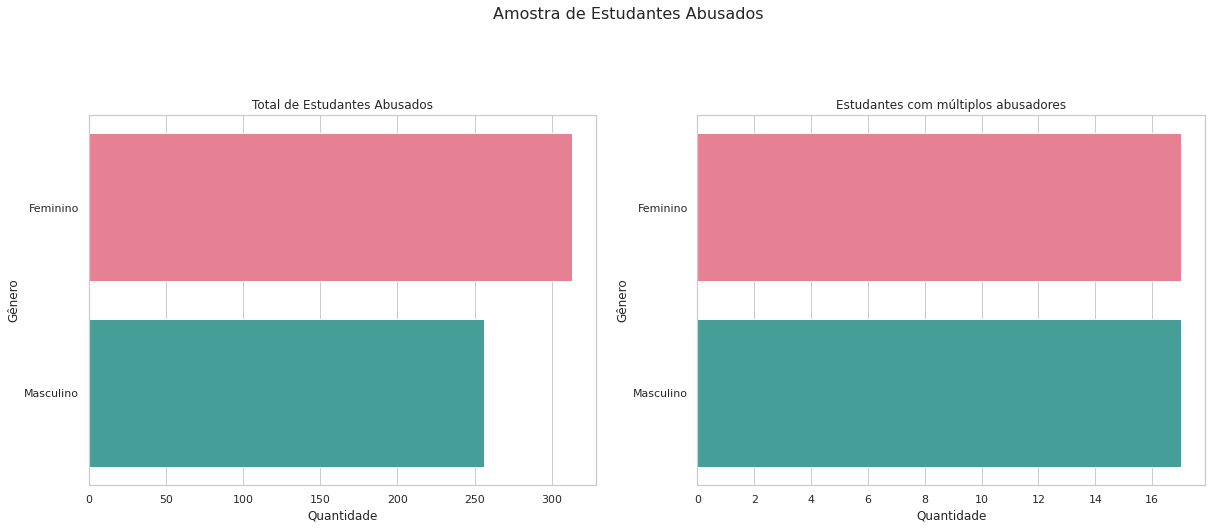

In [625]:
sns.set(style="whitegrid")

plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

# Total da Amostra
plt.subplot(the_grid[0, 0],  title='Total de Estudantes Abusados')
sns.countplot(y='Genero', data=students_sexual_assault, 
              order=['Feminino', 'Masculino'], palette='husl')  
plt.xlabel('Quantidade')
plt.ylabel('Gênero')

# Múltiplos Abusadores
plt.subplot(the_grid[0, 1], title='Estudantes com múltiplos abusadores')
sns.countplot(y=multiple_sex_abusers.index, data=multiple_sex_abusers, 
              order=['Feminino', 'Masculino'], palette='husl')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.suptitle('Amostra de Estudantes Abusados', fontsize=16)
plt.show()

Quais são as idades onde ocorrem o maior número de abusos na amostra analisada?

In [626]:
# Criando um Dataframe com casos de Estudantes abusados por gênero e Idade
students_sex_abusers = students_sexual_assault.groupby(['Genero','Idade'])[['Genero','Idade']].count()
students_sex_abusers.rename(columns={'Genero': 'Quantidade'}, inplace=True)
students_sex_abusers.drop(columns=['Idade'], inplace=True)
students_sex_abusers.reset_index(inplace=True)

Qual a idade, por gênero, onde ocorre o maior número de abusos?

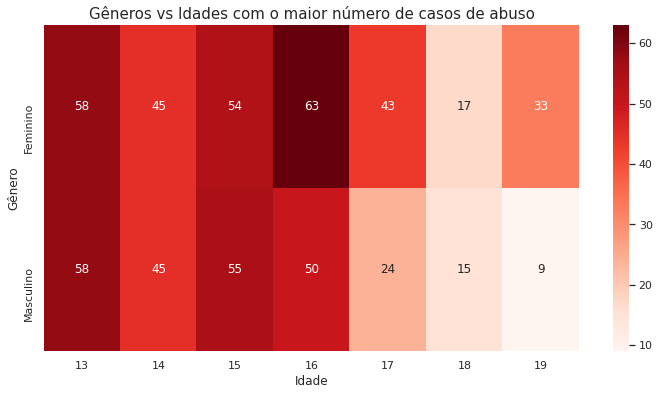

In [627]:
# Criando uma Tabela pivot com as quantidades.
to_plot = students_sex_abusers.pivot('Genero', 'Idade', 'Quantidade')

# Plotanto um HeatMap 
ax = sns.heatmap(to_plot, annot=True, fmt='d', cmap='Reds')
ax.figure.set_size_inches(12,6)
ax.set_title('Gêneros vs Idades com o maior número de casos de abuso', fontsize=15)
ax.set_ylabel('Gênero')

ax;

Dentro da amostra analisada, nota-se que as pessoas do sexo feminino sofrem mais abusos aos 16 anos de idade, enquanto os homens sofrem mais abuso aos 13 anos de idade.

In [628]:
# Gráfico por Gênero, Idade e classe do abusador
fig = px.sunburst(data, path=['Genero', 'Idade', 'Abusador'], values='Qtd_Abusador', color='Genero', hover_data=['Idade','Abusador'] )
fig.update_layout(
    margin = dict(t=50, l=10, r=10, b=10),
    title = { 'text': 'Estudantes abusados por idade e número de abusadores - múltiplos abusadores considerados <br>**Gráfico interativo'},
    height = 600,
    width = 860
)
fig.show()

Note-se que as mulheres também possuem maior número de abusadores do que os homens

In [629]:
students_sexual_assault.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
32,2015,76,1,1,Feminino,1,15,3,6,1,1,1,6,1,1,2,1,1,1,1,2,4,1,4,1,2,2,5,1,3,3,3,4,2,4,3,4,4,-1,2,...,5,4,3,2,-1,1,2,2,5,2,2,2,2,2,2,2,2,1,2,2,2,732.00,1634.00,73.20,163.40,2,3,1223,1,365.58,1,2,4,1,33,1,296,Sim,Outros,1
106,2015,76,1,1,Feminino,4,14,11,6,1,2,5,3,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,6,3,2,4,4,5,2,1,2,5,1,-1,2,...,3,2,2,1,2,2,3,2,8,1,1,2,2,2,2,2,2,2,2,1,2,455.00,1610.00,45.50,161.00,2,2,1221,1,102.76,1,2,4,1,107,2,278,Sim,Pais/Masdrasta/Padrasto,1
132,2015,76,1,1,Masculino,4,15,4,6,1,2,2,3,1,1,1,2,2,1,2,2,2,2,4,3,2,2,5,2,7,1,1,4,5,2,1,3,1,1,1,...,2,4,4,1,1,1,1,1,3,1,-1,2,2,2,2,2,2,1,1,2,2,514.00,1675.00,51.40,167.50,2,2,1121,1,731.06,1,1,2,-1,133,3,406,Sim,Familiar(es),1


In [630]:
students_data = data.query('VB09016 != 99 & VB09016 != -1 & VB0901701 != 99 & VB0901701 != -1 & VB0901702 != 99 & VB0901702 != -1 & VB0901703 != 99 & VB0901703 != -1 & VB0901704 != 99 & VB0901704 != -1 & VB0901705 != 99 & VB0901705 != -1 & VB0901706 != 99 & VB0901706 != -1')
students_data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
32,2015,76,1,1,Feminino,1,15,3,6,1,1,1,6,1,1,2,1,1,1,1,2,4,1,4,1,2,2,5,1,3,3,3,4,2,4,3,4,4,-1,2,...,5,4,3,2,-1,1,2,2,5,2,2,2,2,2,2,2,2,1,2,2,2,732.00,1634.00,73.20,163.40,2,3,1223,1,365.58,1,2,4,1,33,1,296,Sim,Outros,1
106,2015,76,1,1,Feminino,4,14,11,6,1,2,5,3,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,6,3,2,4,4,5,2,1,2,5,1,-1,2,...,3,2,2,1,2,2,3,2,8,1,1,2,2,2,2,2,2,2,2,1,2,455.00,1610.00,45.50,161.00,2,2,1221,1,102.76,1,2,4,1,107,2,278,Sim,Pais/Masdrasta/Padrasto,1
132,2015,76,1,1,Masculino,4,15,4,6,1,2,2,3,1,1,1,2,2,1,2,2,2,2,4,3,2,2,5,2,7,1,1,4,5,2,1,3,1,1,1,...,2,4,4,1,1,1,1,1,3,1,-1,2,2,2,2,2,2,1,1,2,2,514.00,1675.00,51.40,167.50,2,2,1121,1,731.06,1,1,2,-1,133,3,406,Sim,Familiar(es),1


In [631]:
students_sexual_assault.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
32,2015,76,1,1,Feminino,1,15,3,6,1,1,1,6,1,1,2,1,1,1,1,2,4,1,4,1,2,2,5,1,3,3,3,4,2,4,3,4,4,-1,2,...,5,4,3,2,-1,1,2,2,5,2,2,2,2,2,2,2,2,1,2,2,2,732.00,1634.00,73.20,163.40,2,3,1223,1,365.58,1,2,4,1,33,1,296,Sim,Outros,1
106,2015,76,1,1,Feminino,4,14,11,6,1,2,5,3,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,6,3,2,4,4,5,2,1,2,5,1,-1,2,...,3,2,2,1,2,2,3,2,8,1,1,2,2,2,2,2,2,2,2,1,2,455.00,1610.00,45.50,161.00,2,2,1221,1,102.76,1,2,4,1,107,2,278,Sim,Pais/Masdrasta/Padrasto,1
132,2015,76,1,1,Masculino,4,15,4,6,1,2,2,3,1,1,1,2,2,1,2,2,2,2,4,3,2,2,5,2,7,1,1,4,5,2,1,3,1,1,1,...,2,4,4,1,1,1,1,1,3,1,-1,2,2,2,2,2,2,1,1,2,2,514.00,1675.00,51.40,167.50,2,2,1121,1,731.06,1,1,2,-1,133,3,406,Sim,Familiar(es),1


In [632]:
students_sexual_assault.query('VB0901702 == 1')

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
422,2015,76,1,1,Feminino,2,14,1,7,1,1,8,5,2,-1,2,1,2,2,2,2,2,2,4,1,2,2,5,3,8,2,7,8,7,6,1,6,5,1,1,...,2,2,4,2,-1,1,2,1,12,1,1,1,1,1,2,2,2,1,2,2,2,467.00,1515.00,46.70,151.50,2,2,1123,1,354.47,1,1,2,-1,423,10,213,Sim,Amigo(a),1
454,2015,76,1,1,Feminino,4,16,4,5,1,2,3,5,1,1,2,99,2,2,2,2,1,2,5,1,2,2,5,3,8,3,3,1,2,2,5,4,5,4,1,...,4,2,1,1,8,1,3,2,5,1,2,2,2,2,2,2,2,1,2,2,2,592.00,1640.00,59.20,164.00,2,2,1123,1,322.11,1,1,2,-1,455,10,214,Sim,Amigo(a),1
470,2015,76,1,1,Feminino,2,15,10,5,2,1,1,4,1,1,1,1,2,1,1,1,2,1,3,1,1,2,6,2,4,8,7,8,4,2,1,1,6,3,1,...,3,2,4,1,1,1,1,4,5,2,2,1,1,2,2,1,2,1,2,1,2,641.00,1672.00,64.10,167.20,2,2,1123,1,311.71,1,1,2,-1,471,11,173,Sim,Múltiplos,3
732,2015,76,1,1,Feminino,4,15,3,6,1,1,2,5,2,-1,2,1,1,1,1,2,2,2,5,3,2,2,6,3,8,1,4,3,1,8,1,1,1,1,1,...,3,2,4,1,11,1,3,3,13,1,2,2,2,2,2,2,2,1,2,2,2,678.00,1664.00,67.80,166.40,2,3,1123,1,418.21,1,1,2,-1,733,18,246,Sim,Amigo(a),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16047,2015,76,5,1,Feminino,1,13,8,7,1,2,5,5,2,-1,1,1,1,1,1,2,3,1,2,1,2,2,5,5,6,3,3,6,2,3,1,1,6,-1,2,...,5,4,3,1,3,3,3,2,-1,1,1,2,2,2,2,2,2,1,2,2,2,698.00,1682.00,69.80,168.20,2,3,5221,5,160.98,1,2,4,1,16048,361,138,Sim,Amigo(a),1
16097,2015,76,5,1,Feminino,2,13,9,7,1,2,2,5,2,-1,1,1,1,1,1,2,4,2,3,1,2,2,2,3,1,1,8,8,7,6,5,5,5,1,1,...,4,2,4,1,7,1,1,2,13,1,1,2,2,2,2,1,2,2,2,2,2,508.00,1653.00,50.80,165.30,2,2,5121,5,263.51,1,1,2,-1,16098,362,167,Sim,Amigo(a),1
16120,2015,76,5,1,Masculino,4,13,6,7,1,1,5,4,2,-1,2,1,1,1,1,2,3,2,3,1,2,2,5,1,1,6,1,4,4,2,1,3,1,4,1,...,2,1,4,2,-1,2,3,1,1,2,-1,2,2,2,2,1,2,2,2,2,2,387.00,1592.00,38.70,159.20,2,2,5121,5,263.51,1,1,2,-1,16121,362,167,Sim,Amigo(a),1
16524,2015,76,5,1,Feminino,2,13,6,7,1,2,5,4,2,-1,1,2,1,1,1,2,4,2,2,1,2,2,5,3,8,2,6,2,2,1,1,5,5,1,1,...,5,1,2,2,-1,2,1,1,99,1,1,1,1,2,2,2,2,1,2,2,2,585.00,1569.00,58.50,156.90,2,3,5121,5,289.86,1,1,2,-1,16525,370,442,Sim,Amigo(a),1


In [633]:
students_sexual_assault.query('VB0901702 == 1').groupby('Idade').head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
422,2015,76,1,1,Feminino,2,14,1,7,1,1,8,5,2,-1,2,1,2,2,2,2,2,2,4,1,2,2,5,3,8,2,7,8,7,6,1,6,5,1,1,...,2,2,4,2,-1,1,2,1,12,1,1,1,1,1,2,2,2,1,2,2,2,467.00,1515.00,46.70,151.50,2,2,1123,1,354.47,1,1,2,-1,423,10,213,Sim,Amigo(a),1
454,2015,76,1,1,Feminino,4,16,4,5,1,2,3,5,1,1,2,99,2,2,2,2,1,2,5,1,2,2,5,3,8,3,3,1,2,2,5,4,5,4,1,...,4,2,1,1,8,1,3,2,5,1,2,2,2,2,2,2,2,1,2,2,2,592.00,1640.00,59.20,164.00,2,2,1123,1,322.11,1,1,2,-1,455,10,214,Sim,Amigo(a),1
470,2015,76,1,1,Feminino,2,15,10,5,2,1,1,4,1,1,1,1,2,1,1,1,2,1,3,1,1,2,6,2,4,8,7,8,4,2,1,1,6,3,1,...,3,2,4,1,1,1,1,4,5,2,2,1,1,2,2,1,2,1,2,1,2,641.00,1672.00,64.10,167.20,2,2,1123,1,311.71,1,1,2,-1,471,11,173,Sim,Múltiplos,3
732,2015,76,1,1,Feminino,4,15,3,6,1,1,2,5,2,-1,2,1,1,1,1,2,2,2,5,3,2,2,6,3,8,1,4,3,1,8,1,1,1,1,1,...,3,2,4,1,11,1,3,3,13,1,2,2,2,2,2,2,2,1,2,2,2,678.00,1664.00,67.80,166.40,2,3,1123,1,418.21,1,1,2,-1,733,18,246,Sim,Amigo(a),1
1044,2015,76,1,1,Masculino,4,16,4,5,1,1,2,5,2,-1,1,1,2,2,2,2,2,2,6,1,2,2,5,3,1,3,8,1,1,1,1,5,1,1,1,...,3,3,4,1,1,1,3,2,13,1,-1,2,2,1,2,2,2,2,2,2,2,557.00,1650.00,55.70,165.00,2,2,1122,1,718.80,1,1,2,-1,1045,23,306,Sim,Amigo(a),1
1070,2015,76,1,1,Masculino,4,16,11,4,1,2,5,9,2,-1,2,1,1,1,2,2,3,2,6,3,2,2,5,3,4,1,8,4,3,6,5,5,1,1,1,...,3,3,4,1,1,1,1,2,5,1,-1,2,2,2,2,2,2,1,2,2,2,521.00,1760.00,52.10,176.00,2,2,1122,1,733.21,1,1,2,-1,1071,23,307,Sim,Amigo(a),1
1196,2015,76,1,1,Feminino,1,19,2,2,1,1,4,4,1,1,1,1,2,2,2,2,2,2,7,3,1,2,5,3,4,1,8,6,4,1,1,1,1,2,1,...,2,2,4,1,2,1,2,2,13,1,2,2,2,2,2,2,2,2,1,2,2,456.00,1483.00,45.60,148.30,2,2,1122,1,1926.12,1,1,2,-1,1197,26,218,Sim,Amigo(a),1
1321,2015,76,1,1,Masculino,1,13,9,4,1,1,2,7,2,-1,1,2,2,2,2,2,2,2,1,3,1,2,1,1,2,3,2,3,2,2,1,1,1,-1,2,...,3,4,3,1,4,1,1,2,4,1,-1,1,1,2,1,2,2,2,2,2,2,998.00,998.00,41.40,154.90,1,2,1111,1,822.97,2,1,3,-1,1322,30,154,Sim,Amigo(a),1
1330,2015,76,1,1,Masculino,1,13,6,8,1,1,1,6,2,-1,2,2,2,2,2,2,2,2,2,3,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,...,1,1,4,1,1,1,2,1,1,1,-1,2,2,1,2,2,2,2,2,2,2,998.00,998.00,42.10,149.50,1,2,1111,1,822.97,2,1,3,-1,1331,30,154,Sim,Amigo(a),1


In [634]:
students_sexual_assault.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1
20,2015,76,1,1,Masculino,4,15,12,5,1,1,6,4,2,-1,2,2,1,1,1,2,5,2,4,1,1,2,5,3,4,3,3,4,4,2,1,5,1,-1,2,...,1,1,3,2,-1,2,2,1,1,1,-1,2,2,2,2,2,2,1,2,2,2,620.00,1713.00,62.00,171.30,2,2,1223,1,365.58,1,2,4,1,21,1,296,Sim,Amigo(a),1
32,2015,76,1,1,Feminino,1,15,3,6,1,1,1,6,1,1,2,1,1,1,1,2,4,1,4,1,2,2,5,1,3,3,3,4,2,4,3,4,4,-1,2,...,5,4,3,2,-1,1,2,2,5,2,2,2,2,2,2,2,2,1,2,2,2,732.00,1634.00,73.20,163.40,2,3,1223,1,365.58,1,2,4,1,33,1,296,Sim,Outros,1
106,2015,76,1,1,Feminino,4,14,11,6,1,2,5,3,2,-1,2,1,1,1,1,2,2,2,4,1,2,2,6,3,2,4,4,5,2,1,2,5,1,-1,2,...,3,2,2,1,2,2,3,2,8,1,1,2,2,2,2,2,2,2,2,1,2,455.00,1610.00,45.50,161.00,2,2,1221,1,102.76,1,2,4,1,107,2,278,Sim,Pais/Masdrasta/Padrasto,1
132,2015,76,1,1,Masculino,4,15,4,6,1,2,2,3,1,1,1,2,2,1,2,2,2,2,4,3,2,2,5,2,7,1,1,4,5,2,1,3,1,1,1,...,2,4,4,1,1,1,1,1,3,1,-1,2,2,2,2,2,2,1,1,2,2,514.00,1675.00,51.40,167.50,2,2,1121,1,731.06,1,1,2,-1,133,3,406,Sim,Familiar(es),1


In [635]:
sexual_assault_quantities_gender = students_sexual_assault.groupby(['Genero','Idade','Abusador'])['REGEOGR'].count().reset_index()
sexual_assault_quantities_gender.rename(columns={'REGEOGR': 'Quantidade'}, inplace=True)
sexual_assault_quantities_gender.head(20)

,Genero,Idade,Abusador,Quantidade
0,Feminino,13,Amigo(a),10
1,Feminino,13,Desconhecido(a),9
2,Feminino,13,Familiar(es),9
3,Feminino,13,Múltiplos,5
4,Feminino,13,Namorado(a),13
5,Feminino,13,Não,1
6,Feminino,13,Outros,7
7,Feminino,13,Pais/Masdrasta/Padrasto,4
8,Feminino,14,Amigo(a),7
9,Feminino,14,Desconhecido(a),5


In [636]:
sexual_assault_quantities = students_sexual_assault.groupby(['Idade','Abusador'])['REGEOGR'].count().reset_index()
sexual_assault_quantities.rename(columns={'REGEOGR': 'Quantidade'}, inplace=True)
sexual_assault_quantities.head(20)

,Idade,Abusador,Quantidade
0,13,Amigo(a),32
1,13,Desconhecido(a),12
2,13,Familiar(es),10
3,13,Múltiplos,12
4,13,Namorado(a),24
5,13,Não,2
6,13,Outros,15
7,13,Pais/Masdrasta/Padrasto,9
8,14,Amigo(a),14
9,14,Desconhecido(a),10


In [637]:
# Criando um Dataframe com casos de Estudantes abusados por gênero e Idade
students_sex_abusers = students_sexual_assault[['Genero','Idade','Qtd_Abusador']].set_index('Genero')
students_sex_abusers.groupby(students_sex_abusers.index).count()
students_sex_abusers.reset_index()

students_sex_abusers.query('Genero == "Masculino"')

,Idade,Qtd_Abusador
Genero,,
Masculino,13,1
Masculino,15,1
Masculino,15,1
Masculino,15,1
Masculino,17,1
...,...,...
Masculino,13,1
Masculino,13,1
Masculino,13,2


In [638]:
sexual_assault_quantities.head(3)

,Idade,Abusador,Quantidade
0,13,Amigo(a),32
1,13,Desconhecido(a),12
2,13,Familiar(es),10


In [639]:
sexual_assault_quantities.query('Abusador == "Amigo(a)"').T

,0,8,16,24,31,38,45
Idade,13,14,15,16,17,18,19
Abusador,Amigo(a),Amigo(a),Amigo(a),Amigo(a),Amigo(a),Amigo(a),Amigo(a)
Quantidade,32,14,14,25,7,8,6


In [640]:
# Plotando os estudantes que tiveram relações sexuais forçadas por classe do abusador
to_plot = go.Figure(data=[go.Bar(
    name = 'Amigo(a)',
    x=sexual_assault_quantities.query('Abusador == "Amigo(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Amigo(a)"')['Quantidade'],
    hovertemplate=
    "<b>Amigo(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ), 
   go.Bar(
    name = 'Desconhecido(a)',
    x=sexual_assault_quantities.query('Abusador == "Desconhecido(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Desconhecido(a)"')['Quantidade'],
    hovertemplate=
    "<b>Desconhecido(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Familiar(es)',
    x=sexual_assault_quantities.query('Abusador == "Familiar(es)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Familiar(es)"')['Quantidade'],
    hovertemplate=
    "<b>Familiar(es)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Namorado(a)',
    x=sexual_assault_quantities.query('Abusador == "Namorado(a)"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Namorado(a)"')['Quantidade'],
    hovertemplate=
    "<b>Namorado(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Outros',
    x=sexual_assault_quantities.query('Abusador == "Outros"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Outros"')['Quantidade'],
    hovertemplate=
    "<b>Outros</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Múltiplos',
    x=sexual_assault_quantities.query('Abusador == "Múltiplos"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Múltiplos"')['Quantidade'],
    hovertemplate=
    "<b>Múltiplos</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),   
   go.Bar(
    name = 'Pais/Masdrasta/Padrasto',
    x=sexual_assault_quantities.query('Abusador == "Pais/Masdrasta/Padrasto"')['Idade'],
    y=sexual_assault_quantities.query('Abusador == "Pais/Masdrasta/Padrasto"')['Quantidade'],
    hovertemplate=
    "<b>Pais/Masdrasta/Padrasto</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Estudantes que foram forçados a praticar sexo por tipo de agressor <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Quantidade de estudantes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Idade em anos', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.update_traces(textposition='auto')
to_plot.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',legend=dict(
        x=1.01,
        y=0.6
    ))

to_plot.layout.title.x=0.55
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()


In [641]:
# Plotando os estudantes que tiveram relações sexuais forçadas por classe do abusador
to_plot = go.Figure(data=[go.Bar(
    name = 'Amigo(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Amigo(a)"')['Quantidade'],
    hovertemplate=
    "<b>Amigo(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ), 
   go.Bar(
    name = 'Desconhecido(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Desconhecido(a)"')['Quantidade'],
    hovertemplate=
    "<b>Desconhecido(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Familiar(es)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Familiar(es)"')['Quantidade'],
    hovertemplate=
    "<b>Familiar(es)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Namorado(a)',
    x=[sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Namorado(a)"')['Quantidade'],
    hovertemplate=
    "<b>Namorado(a)</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Outros',
    x=[sexual_assault_quantities_gender.query('Abusador == "Outros"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Outros"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Outros"')['Quantidade'],
    hovertemplate=
    "<b>Outros</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),
   go.Bar(
    name = 'Múltiplos',
    x=[sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Múltiplos"')['Quantidade'],
    hovertemplate=
    "<b>Múltiplos</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   ),   
   go.Bar(
    name = 'Pais/Masdrasta/Padrasto',
    x=[sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Genero'],
    sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Idade']],
    y=sexual_assault_quantities_gender.query('Abusador == "Pais/Masdrasta/Padrasto"')['Quantidade'],
    hovertemplate=
    "<b>Pais/Masdrasta/Padrasto</b><br><br>" +
    "Idade: %{x}<br>" +
    "Quantidade: %{y}<br>" +
    "<extra></extra>"
   )
])

# Ajustando o Layout
to_plot.update_layout(
    template = 'plotly_white',
    title = { 'text': 'Estudantes que foram forçados a praticar sexo por tipo de agressor e Gênero <br>**Gráfico interativo',
              'font': dict(size=20) },
    legend=dict(title='', orientation="v", y=0.96,
                yanchor="bottom", xanchor="right", x = 1),
    yaxis = { 'title': 'Quantidade de estudantes', 'categoryorder': 'total descending'},
    xaxis = { 'title': 'Idade em anos', 'categoryorder': 'total descending' },
    autosize = True, 
    hovermode = 'x'
)

to_plot.update_traces(textposition='auto')
to_plot.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',legend=dict(
        x=1.01,
        y=0.6
    ))

to_plot.layout.title.x=0.55
to_plot.update_coloraxes(colorbar_bgcolor="rgba(0,0,0,0)")

to_plot.update_layout(barmode='group')

to_plot.show()

In [642]:
data.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,Genero,VB01002,Idade,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,Abuso_sexual,Abusador,Qtd_Abusador
0,2015,76,1,1,Feminino,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,1570.00,37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296,Não,Não,0
1,2015,76,1,1,Feminino,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,1520.00,50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296,Não,Não,0
2,2015,76,1,1,Masculino,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,1614.00,48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296,Não,Não,0
3,2015,76,1,1,Masculino,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,1725.00,69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296,Não,Não,0
4,2015,76,1,1,Masculino,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,1675.00,78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296,Sim,Outros,1


In [643]:
# Criando dataframe com estudantes que não sofreram abuso sexual
no_sex_abuse_students = data.loc[data['Abuso_sexual']  == "Não"] 
sex_abuse_students = data.loc[data['Abuso_sexual']  == "Sim"] 

In [644]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB11006 - Você considera sua imagem corporal como sendo algo:
answers = dictionary_by_id['VB11006']['Respostas']
no_abused_frequency_dist_body_image  = frequency_table(no_sex_abuse_students, 'VB11006', 'Sentimento em relação a sua Imagem Corporal', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta VB11006 - Você considera sua imagem corporal como sendo algo:
answers = dictionary_by_id['VB11006']['Respostas']
abused_frequency_dist_body_image  = frequency_table(sex_abuse_students, 'VB11006', 'Sentimento em relação a sua Imagem Corporal', answers )

In [645]:
# Plotando as tabelas de frequencia
table_to_plot = styled_table(no_abused_frequency_dist_body_image,abused_frequency_dist_body_image)
HTML(table_to_plot)

Sentimento em relação a sua Imagem Corporal,Frequency,Rate
Muito importante,6810,42.60
Importante,6439,40.28
Pouco importante,1903,11.90
Sem importância,684,4.28
Não informado,151,0.94
Sentimento em relação a sua Imagem Corporal,Frequency,Rate
Muito importante,292,51.32
Importante,165,29.00
Pouco importante,66,11.60
Sem importância,42,7.38


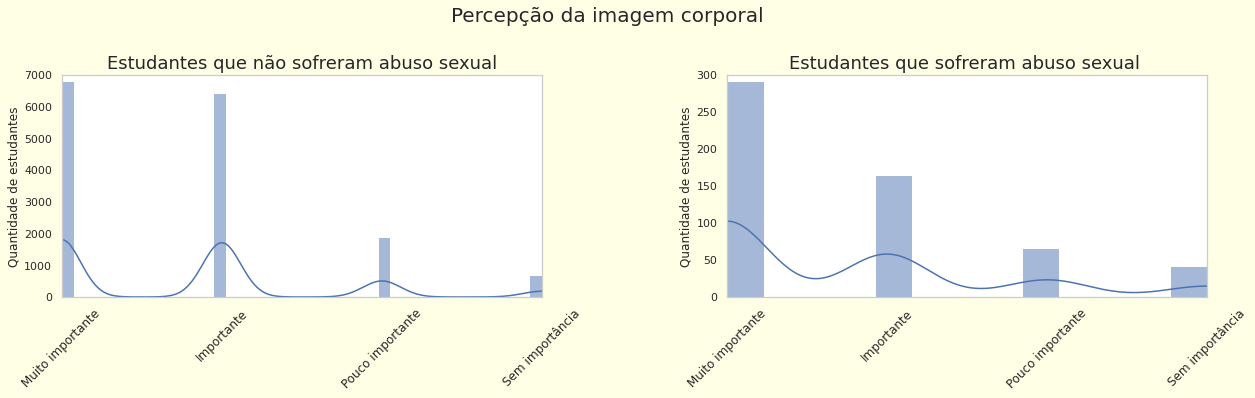

In [646]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB11006 != 99")
to_plot_abused = sex_abuse_students.query("VB11006 != 99")

#lists '
dictList =['Muito importante',
           ' ',
          'Importante',
           ' ',
          'Pouco importante',
           ' ',
          'Sem importância'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Percepção da imagem corporal',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB11006', 
                   kde = True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid()

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,7000)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,4)
plt.tight_layout(pad=4, h_pad=4, w_pad=12)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB11006', 
                   #bins=60,  
                   kde = True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade de estudantes')

ax2.figure.set_facecolor('#ffffe6')

ax2.grid()
ax2.axes.set_ylim(0,300)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(1,4)

plt.show()

In [647]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta 
# VB11006 - Que idade você tinha quando usou droga como maconha, cocaína, crack, 
#cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?
answers = dictionary_by_id['VB06002']['Respostas']
no_abused_frequency_dist_drugs  = frequency_table(no_sex_abuse_students, 'VB06002', 'Primeiro contato com drogas', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta 
# VB11006 - Que idade você tinha quando usou droga como maconha, cocaína, crack, 
# cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?
answers = dictionary_by_id['VB06002']['Respostas']
abused_frequency_dist_drugs  = frequency_table(sex_abuse_students, 'VB06002', 'Primeiro contato com drogas', answers )

In [648]:
table_to_plot = styled_table(no_abused_frequency_dist_drugs,abused_frequency_dist_drugs)
HTML(table_to_plot)

Primeiro contato com drogas,Frequency,Rate
Pulo no questionário,14714,92.04
15 anos,300,1.88
14 anos,268,1.68
13 anos,217,1.36
16 anos,180,1.13
12 anos,99,0.62
17 anos,88,0.55
11 anos,36,0.23
18 anos ou mais,29,0.18
7 anos ou menos,21,0.13


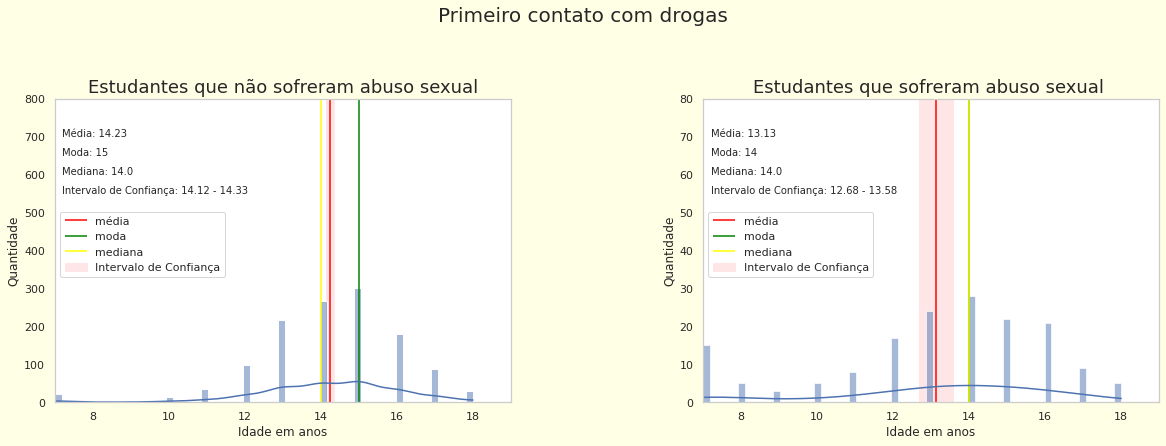

In [649]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB06002 != -1 & VB06002 != 99")
to_plot_abused = sex_abuse_students.query("VB06002 != -1 & VB06002 != 99")

# Calcula média, moda e mediana para estudantes não abusados sexualmente
height_mean1   = to_plot_noabused['VB06002'].mean()
height_mode1   = to_plot_noabused['VB06002'].mode()[0]
height_median1 = to_plot_noabused['VB06002'].median()

# Calcula média, moda e mediana para estudantes abusados sexualmente
height_mean2   = to_plot_abused['VB06002'].mean()
height_mode2   = to_plot_abused['VB06002'].mode()[0]
height_median2 = to_plot_abused['VB06002'].median()

# Intervalo de confiânça para estudantes não abusados sexualmente 
conf_inti_ini1 = zconfint(to_plot_noabused["VB06002"])[0] 
conf_inti_end1 = zconfint(to_plot_noabused["VB06002"])[1] 

# Intervalo de confiânça para estudantes abusados sexualmente
conf_inti_ini2 = zconfint(to_plot_abused["VB06002"])[0] 
conf_inti_end2 = zconfint(to_plot_abused["VB06002"])[1] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Primeiro contato com drogas',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB06002', 
                   bins=60,  
                   kde = True)

ax1.figure.set_size_inches(18, 7)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax1.vlines(height_mean1, ymin=0, ymax = 800, color='red', label='média')
ax1.vlines(height_mode1, ymin=0, ymax = 800, color='green', label='moda')
ax1.vlines(height_median1, ymin=0, ymax = 800, color='yellow', label='mediana')

# Anotações dos valores para estudantes não abusados sexualmente 
ax1.annotate(f'Média: {round(height_mean1,2)}', xy=(7.2,700), fontsize=10)
ax1.annotate(f'Moda: {round(height_mode1,2)}', xy=(7.2,650), fontsize=10)
ax1.annotate(f'Mediana: {round(height_median1,2)}', xy=(7.2,600), fontsize=10)
ax1.annotate(f'Intervalo de Confiança: {round(conf_inti_ini1,2)} - {round(conf_inti_end1,2)}', xy=(7.2,550), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Idade em anos')
ax1.set_ylabel('Quantidade')
ax1.grid()

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax1.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini1,
                 x2=conf_inti_end1,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax1.figure.set_facecolor('#ffffe6')

ax1.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax1.axes.set_ylim(0,800)
plt.xlim(7,19)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB06002', bins=60,  
                   kde = True)

ax2.figure.set_size_inches(18, 7)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax2.vlines(height_mean2, ymin=0, ymax = 80, color='red', label='média')
ax2.vlines(height_mode2, ymin=0, ymax = 80, color='green', label='moda')
ax2.vlines(height_median2, ymin=0, ymax = 80, color='yellow', label='mediana')

# Anotações dos valores para estudantes não abusados sexualmente 
ax2.annotate(f'Média: {round(height_mean2,2)}', xy=(7.2,70), fontsize=10)
ax2.annotate(f'Moda: {round(height_mode2,2)}', xy=(7.2,65), fontsize=10)
ax2.annotate(f'Mediana: {round(height_median2,2)}', xy=(7.2,60), fontsize=10)
ax2.annotate(f'Intervalo de Confiança: {round(conf_inti_ini2,2)} - {round(conf_inti_end2,2)}', xy=(7.2,55), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Idade em anos')
ax2.set_ylabel('Quantidade')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax2.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini2,
                 x2=conf_inti_end2,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax2.figure.set_facecolor('#ffffe6')

ax2.grid()

ax2.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax2.axes.set_ylim(0,80)
plt.xlim(7,19)

plt.show()

In [650]:

# Criando tabela de frequencia para estudantes não abusados para a pergunta VB06003A - NOS ÚLTIMOS 30 DIAS, quantos dias você 
# usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy, etc?
answers = dictionary_by_id['VB06003A']['Respostas']
no_abused_frequency_dist_drugs  = frequency_table(no_sex_abuse_students, 'VB06003A', 'Últimos 30 dias - uso drogas', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta VB06003A - NOS ÚLTIMOS 30 DIAS, quantos dias você 
# usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy, etc?
answers = dictionary_by_id['VB06003A']['Respostas']
abused_frequency_dist_drugs  = frequency_table(sex_abuse_students, 'VB06003A', 'Últimos 30 dias - uso drogas', answers )


In [651]:
table_to_plot = styled_table(no_abused_frequency_dist_drugs,abused_frequency_dist_drugs)
HTML(table_to_plot)

Últimos 30 dias - uso drogas,Frequency,Rate
Pulo no questionário,14714,92.04
Nenhum dia nos últimos 30 dias (0 dia),720,4.50
1 ou 2 dias nos últimos 30 dias,282,1.76
10 ou mais dias nos últimos 30 dias,127,0.79
3 a 5 dias nos últimos 30 dias,85,0.53
6 a 9 dias nos últimos 30 dias,53,0.33
Não informado,6,0.04
Últimos 30 dias - uso drogas,Frequency,Rate
Pulo no questionário,403,70.83
Nenhum dia nos últimos 30 dias (0 dia),77,13.53


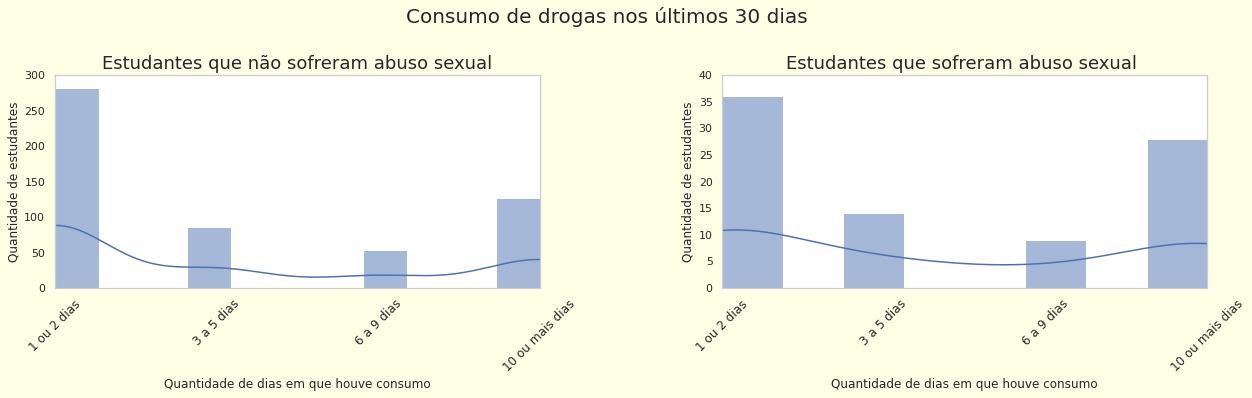

In [652]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB06003A != -1 & VB06003A != 99 & VB06003A != 1")
to_plot_abused = sex_abuse_students.query("VB06003A != -1 & VB06003A != 99 & VB06003A != 1")

#lists '
dictList =['1 ou 2 dias',
           ' ',
          '3 a 5 dias',
           ' ',
          '6 a 9 dias',
           ' ',
          '10 ou mais dias'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Consumo de drogas nos últimos 30 dias',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB06003A', 
                   kde = True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Quantidade de dias em que houve consumo')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid()

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,300)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,5)
plt.tight_layout(pad=4, h_pad=4, w_pad=12)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB06003A', 
                   #bins=60,  
                   kde = True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Quantidade de dias em que houve consumo')
ax2.set_ylabel('Quantidade de estudantes')

ax2.figure.set_facecolor('#ffffe6')

ax2.grid()
ax2.axes.set_ylim(0,40)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,5)

plt.show()

In [653]:
# Criando tabela de frequencia para estudantes não abusados para a pergunta VB05003 - 
# Que idade você tinha quando tomou a primeira dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
answers = dictionary_by_id['VB05003']['Respostas']
no_abused_frequency_dist_alc  = frequency_table(no_sex_abuse_students, 'VB05003', 'Primeiro contato bebida alcoólica', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# Que idade você tinha quando tomou a primeira dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)
answers = dictionary_by_id['VB05003']['Respostas']
abused_frequency_dist_alc  = frequency_table(sex_abuse_students, 'VB05003', 'Primeiro contato bebida alcoólica', answers )


In [654]:
table_to_plot = styled_table(no_abused_frequency_dist_alc,abused_frequency_dist_alc)
HTML(table_to_plot)

Primeiro contato bebida alcoólica,Frequency,Rate
Pulo no questionário,4706,29.44
Nunca tomei bebida alcoólica,4464,27.92
14 anos,1437,8.99
13 anos,1238,7.74
15 anos,1205,7.54
12 anos,936,5.85
16 anos,487,3.05
11 anos,344,2.15
10 anos,332,2.08
17 anos,251,1.57


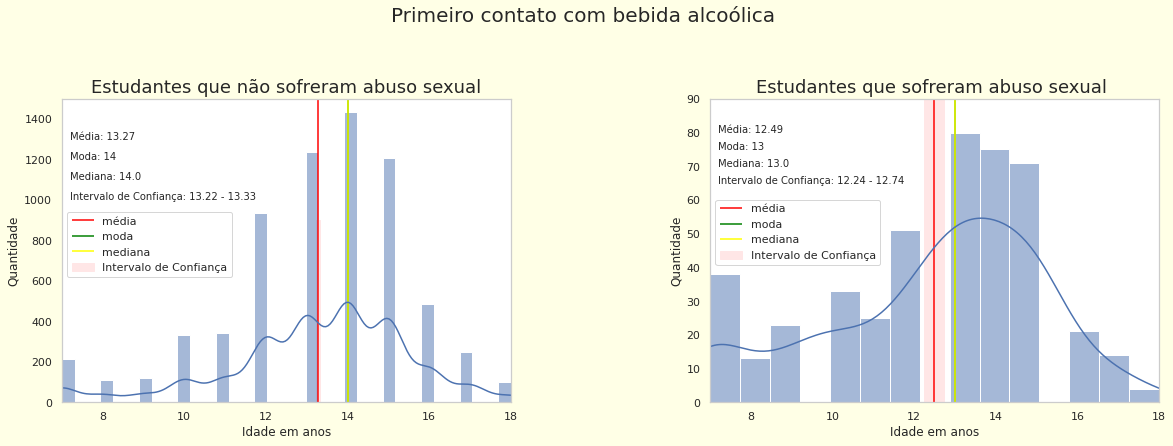

In [655]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB05003 != -1 & VB05003 != 99 & VB05003 != 1")
to_plot_abused = sex_abuse_students.query("VB05003 != -1 & VB05003 != 99 & VB05003 != 1")

# Calcula média, moda e mediana para estudantes não abusados sexualmente
height_mean1   = to_plot_noabused['VB05003'].mean()
height_mode1   = to_plot_noabused['VB05003'].mode()[0]
height_median1 = to_plot_noabused['VB05003'].median()

# Calcula média, moda e mediana para estudantes abusados sexualmente
height_mean2   = to_plot_abused['VB05003'].mean()
height_mode2   = to_plot_abused['VB05003'].mode()[0]
height_median2 = to_plot_abused['VB05003'].median()

# Intervalo de confiânça para estudantes não abusados sexualmente 
conf_inti_ini1 = zconfint(to_plot_noabused["VB05003"])[0] 
conf_inti_end1 = zconfint(to_plot_noabused["VB05003"])[1] 

# Intervalo de confiânça para estudantes abusados sexualmente
conf_inti_ini2 = zconfint(to_plot_abused["VB05003"])[0] 
conf_inti_end2 = zconfint(to_plot_abused["VB05003"])[1] 

# Plotanto os gráficos
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.suptitle('Primeiro contato com bebida alcoólica',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB05003', 
                  # bins=60,  
                   kde = True)

ax1.figure.set_size_inches(18, 7)
ax1.set_title('Estudantes que não sofreram abuso sexual', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax1.vlines(height_mean1, ymin=0, ymax = 1500, color='red', label='média')
ax1.vlines(height_mode1, ymin=0, ymax = 1500, color='green', label='moda')
ax1.vlines(height_median1, ymin=0, ymax = 1500, color='yellow', label='mediana')

# Anotações dos valores para estudantes não abusados sexualmente 
ax1.annotate(f'Média: {round(height_mean1,2)}', xy=(7.2,1300), fontsize=10)
ax1.annotate(f'Moda: {round(height_mode1,2)}', xy=(7.2,1200), fontsize=10)
ax1.annotate(f'Mediana: {round(height_median1,2)}', xy=(7.2,1100), fontsize=10)
ax1.annotate(f'Intervalo de Confiança: {round(conf_inti_ini1,2)} - {round(conf_inti_end1,2)}', xy=(7.2,1000), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Idade em anos')
ax1.set_ylabel('Quantidade')
ax1.grid()

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax1.fill_betweenx(y=[0,900], 
                 x1=conf_inti_ini1,
                 x2=conf_inti_end1,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax1.figure.set_facecolor('#ffffe6')

ax1.legend(loc='center left', bbox_to_anchor=((0.0,0.52)))
ax1.axes.set_ylim(0,1500)
plt.xlim(7,18)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB05003', 
                   #bins=60,  
                   kde = True)

ax2.figure.set_size_inches(18, 7)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Marcando com linhas verticais no gráfico para estudantes não abusados sexualmente 
ax2.vlines(height_mean2, ymin=0, ymax = 90, color='red', label='média')
ax2.vlines(height_mode2, ymin=0, ymax = 90, color='green', label='moda')
ax2.vlines(height_median2, ymin=0, ymax = 90, color='yellow', label='mediana')

# Anotações dos valores para estudantes não abusados sexualmente 
ax2.annotate(f'Média: {round(height_mean2,2)}', xy=(7.2,80), fontsize=10)
ax2.annotate(f'Moda: {round(height_mode2,2)}', xy=(7.2,75), fontsize=10)
ax2.annotate(f'Mediana: {round(height_median2,2)}', xy=(7.2,70), fontsize=10)
ax2.annotate(f'Intervalo de Confiança: {round(conf_inti_ini2,2)} - {round(conf_inti_end2,2)}', xy=(7.2,65), fontsize=10)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Idade em anos')
ax2.set_ylabel('Quantidade')

# Marcando com linhas intervalos de confiança para estudantes não abusados sexualmente 
ax2.fill_betweenx(y=[0,90], 
                 x1=conf_inti_ini2,
                 x2=conf_inti_end2,
                 color='#ffe6e6', label='Intervalo de Confiança')
ax2.figure.set_facecolor('#ffffe6')

ax2.grid()

ax2.legend(loc='center left', bbox_to_anchor=((0.0,0.56)))
ax2.axes.set_ylim(0,90)
plt.xlim(7,18)

plt.show()

In [656]:

# Criando tabela de frequencia para estudantes não abusados para a pergunta VB05004 - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc) 

answers = dictionary_by_id['VB05004']['Respostas']
no_abused_frequency_dist_alc_use  = frequency_table(no_sex_abuse_students, 'VB05004', 'Uso de bebida alcoólica', answers )

# Criando tabela de frequencia para estudantes abusados para a pergunta  - 
# NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? 
# (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc) 

answers = dictionary_by_id['VB05004']['Respostas']
abused_frequency_dist_alc_use  = frequency_table(sex_abuse_students, 'VB05004', 'Uso de bebida alcoólica', answers )

In [668]:
table_to_plot = styled_table(no_abused_frequency_dist_alc_use,abused_frequency_dist_alc_use)
HTML(table_to_plot)

Uso de bebida alcoólica,Frequency,Rate
Pulo no questionário,9113,57.00
Nenhum dia nos últimos 30 dias (0 dia),3631,22.71
1 ou 2 dias nos últimos 30 dias,1828,11.43
3 a 5 dias nos últimos 30 dias,654,4.09
6 a 9 dias nos últimos 30 dias,352,2.20
10 a 19 dias nos últimos 30 dias,241,1.51
20 a 29 dias nos últimos 30 dias,82,0.51
Todos os dias nos últimos 30 dias,74,0.46
Não informado,12,0.08
Uso de bebida alcoólica,Frequency,Rate


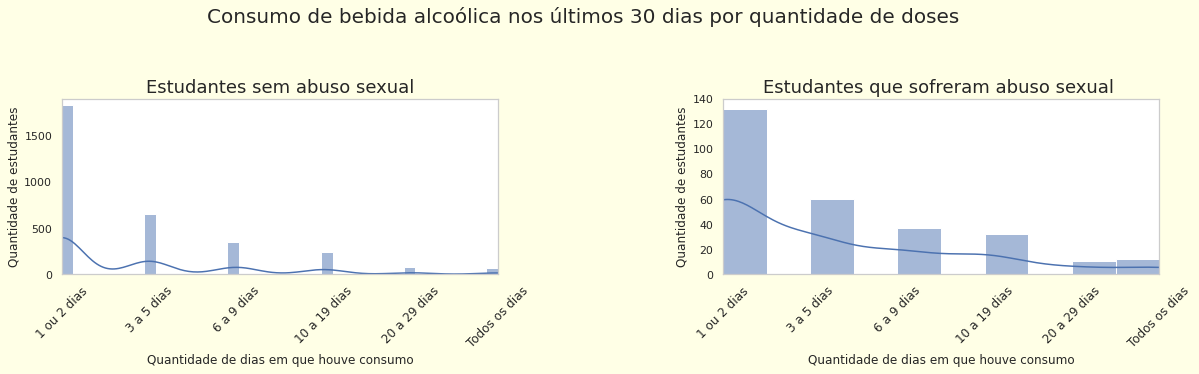

In [658]:
# Criando os datasets que serão plotados
to_plot_noabused = no_sex_abuse_students.query("VB05004 != -1 & VB05004 != 99 & VB05004 != 1")
to_plot_abused = sex_abuse_students.query("VB05004 != -1 & VB05004 != 99 & VB05004 != 1")

#lists '
dictList =['1 ou 2 dias',
          '3 a 5 dias',
          '6 a 9 dias',
          '10 a 19 dias',
          '20 a 29 dias',
          'Todos os dias'] 

# Plotanto os gráficos
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
plt.suptitle('Consumo de bebida alcoólica nos últimos 30 dias por quantidade de doses',fontsize=20, y=1)

ax1 = sns.histplot(data = to_plot_noabused, 
                   x = 'VB05004', 
                   #bins=60,  
                   kde = True)

ax1.figure.set_size_inches(18, 6)
ax1.set_title('Estudantes sem abuso sexual', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax1.set_xlabel('Quantidade de dias em que houve consumo')
ax1.set_ylabel('Quantidade de estudantes')
ax1.grid()

ax1.figure.set_facecolor('#ffffe6')

ax1.axes.set_ylim(0,1900)

ax1.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)
plt.tight_layout(pad=6, h_pad=4, w_pad=16)

# Segundo gráfico - para estudantes abusados sexualmente
plt.subplot(1,2,2)
ax2 = sns.histplot(data = to_plot_abused, 
                   x = 'VB05004', 
                   #bins=60,  
                   kde = True)

ax2.figure.set_size_inches(18, 6)
ax2.set_title('Estudantes que sofreram abuso sexual ', fontsize=18)

# Nomeando os eixos para estudantes não abusados sexualmente 
ax2.set_xlabel('Quantidade de dias em que houve consumo')
ax2.set_ylabel('Quantidade de estudantes')

ax2.grid()

ax2.axes.set_ylim(0,140)
ax2.set_xticklabels(dictList, rotation='45', fontsize=12)

plt.xlim(2,7)

plt.show()

In [659]:
# Criando um Dataframe com casos de Estudantes com múltiplos abusadores por gênero e Idade
multiple_sex_abusers = students_sexual_assault.loc[students_sexual_assault['Qtd_Abusador'] > 1].set_index('Genero')[['Idade','Qtd_Abusador']]
multiple_sex_abusers.groupby(multiple_sex_abusers.index).count()
multiple_sex_abusers.reset_index()

multiple_sex_abusers.query('Genero == "Feminino"')

,Idade,Qtd_Abusador
Genero,,
Feminino,15,3
Feminino,16,2
Feminino,16,2
Feminino,13,2
Feminino,13,2
Feminino,13,2
Feminino,13,2
Feminino,13,2
Feminino,18,2


In [660]:
sexual_assault_quantities_gender.head(1)

,Genero,Idade,Abusador,Quantidade
0,Feminino,13,Amigo(a),10


Text(0.5, 0, 'Idade')

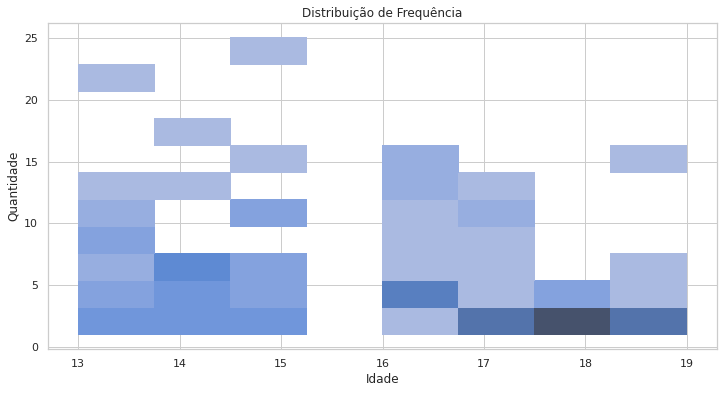

In [661]:
ax = sns.histplot(data = sexual_assault_quantities_gender, x='Idade', y='Quantidade', kde = True) # bin divide em n número de classes / kde curva que modela os pontos
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Idade')

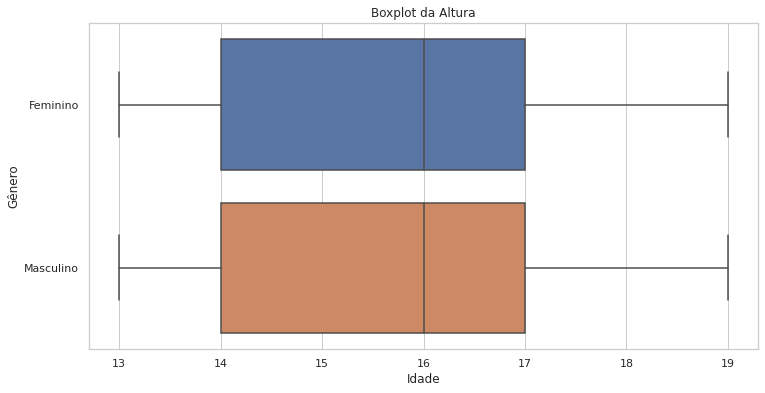

In [662]:
# Bloxplot
# Altura e sexo
ax = sns.boxplot(data = sexual_assault_quantities_gender, x= 'Idade', y ='Genero', orient='h') # Determinar horizontal sempre horizontal quando for mais de um box plot
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da Altura')
ax.set_xlabel('Idade')
ax.set_ylabel('Gênero')
# Para remover o <matplotlib.axes._subplots.AxesSubplot at 0x7f4bb71c4ba8> usar plt.show() ou ; depois do x
ax;

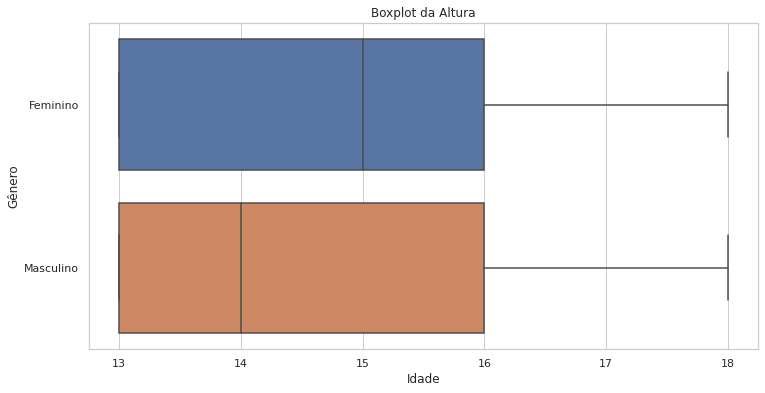

In [663]:
# Bloxplot
# Altura e sexo
ax = sns.boxplot(data = multiple_sex_abusers, x= 'Idade', y =multiple_sex_abusers.index, orient='h') # Determinar horizontal sempre horizontal quando for mais de um box plot
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da Altura')
ax.set_xlabel('Idade')
ax.set_ylabel('Gênero')
# Para remover o <matplotlib.axes._subplots.AxesSubplot at 0x7f4bb71c4ba8> usar plt.show() ou ; depois do x
ax;


In [664]:
# Gráfico por Gênero, Idade e classe do abusador
fig = px.sunburst(multiple_sex_abusers, path=[multiple_sex_abusers.index, 'Idade', 'Qtd_Abusador'], values='Qtd_Abusador', color=multiple_sex_abusers.index, hover_data=['Idade','Qtd_Abusador'] )
fig.update_layout(
    margin = dict(t=50, l=10, r=10, b=10),
    title = { 'text': 'Estudantes que tiveram relações sexuais forçadas por idade e número de abusadores <br>**Gráfico interativo'},
    height = 600,
    width = 860
)
fig.show()

Text(0, 0.5, 'Proporção de Doses Aplicadas\n')

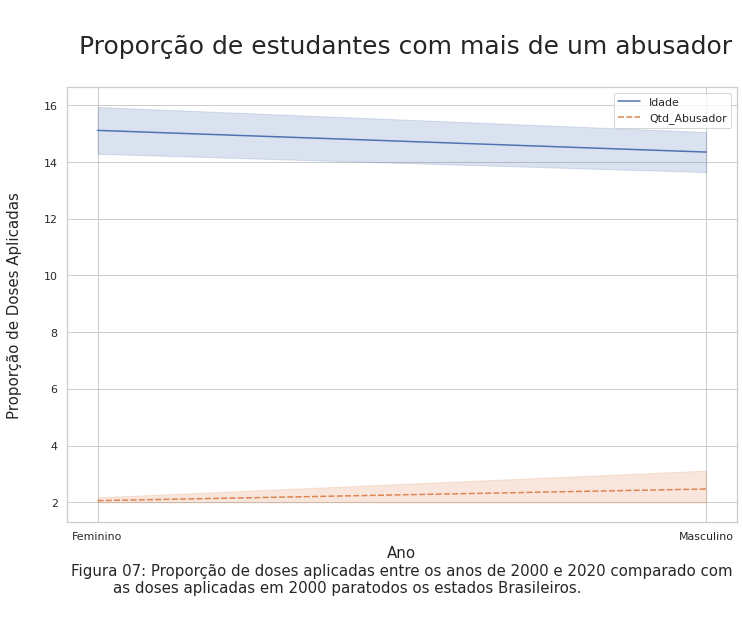

In [665]:
#### Gerar Gráfico da proporção de doses
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=multiple_sex_abusers)
# Ajustar legenda
ax.legend(bbox_to_anchor=(1,1))
# Ajustar título e eixos
ax.set_title('\n Proporção de estudantes com mais de um abusador\n',
         fontsize=25)
ax.set_xlabel('''Ano
Figura 07: Proporção de doses aplicadas entre os anos de 2000 e 2020 comparado com
as doses aplicadas em 2000 paratodos os estados Brasileiros.                       
''', fontsize=15)
ax.set_ylabel('''Proporção de Doses Aplicadas
''', fontsize=15)




In [666]:
students_sexual_assault.query('(VB0901701 == 1 | VB0901702 == 1 | VB0901703 == 1 | VB0901704 == 1 | VB0901705 == 1 | VB0901706 == 1) & VB09016 == 1')[['Idade','VB0901701','VB0901702','VB0901703','VB0901704','VB0901705','VB0901706','Abuso_sexual','Abusador', 'Qtd_Abusador']]

,Idade,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,Abuso_sexual,Abusador,Qtd_Abusador
4,13,2,2,2,2,2,1,Sim,Outros,1
20,15,2,1,2,2,2,2,Sim,Amigo(a),1
32,15,2,2,2,2,2,1,Sim,Outros,1
106,14,2,2,1,2,2,2,Sim,Pais/Masdrasta/Padrasto,1
132,15,2,2,2,1,2,2,Sim,Familiar(es),1
...,...,...,...,...,...,...,...,...,...,...
16493,16,2,2,2,2,2,1,Sim,Outros,1
16496,16,1,2,2,2,2,2,Sim,Namorado(a),1
16524,13,2,1,2,2,2,2,Sim,Amigo(a),1
16533,13,2,1,2,2,2,2,Sim,Amigo(a),1


In [667]:
students_sexual_assault.query('VB0901705 == 1 & VB09016 == 1')[['VB0901701','VB0901702','VB0901703','VB0901704','VB0901705','VB0901706','Abuso_sexual','Abusador','Qtd_Abusador']]

,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,Abuso_sexual,Abusador,Qtd_Abusador
134,2,2,2,2,1,2,Sim,Desconhecido(a),1
251,2,2,2,2,1,2,Sim,Desconhecido(a),1
313,2,2,2,2,1,2,Sim,Desconhecido(a),1
550,2,2,2,2,1,2,Sim,Desconhecido(a),1
726,2,2,2,2,1,2,Sim,Desconhecido(a),1
...,...,...,...,...,...,...,...,...,...
15326,2,2,2,1,1,1,Sim,Múltiplos,3
16256,1,2,2,2,1,2,Sim,Múltiplos,2
16264,2,2,2,2,1,2,Sim,Desconhecido(a),1
16344,2,2,2,2,1,2,Sim,Desconhecido(a),1
